In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/home/guillaume/code/GGIML/vivadata-student/data/fraud_detection/creditcard.csv')

In [4]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## Exploratory Data Analysis

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
data.duplicated().sum()

1081

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [10]:
data.Class.value_counts('normalize')

0    0.998333
1    0.001667
Name: Class, dtype: float64

In [11]:
data.groupby('Class').Amount.mean()

Class
0     88.413575
1    123.871860
Name: Amount, dtype: float64

In [12]:
data.groupby('Class').Amount.max()

Class
0    25691.16
1     2125.87
Name: Amount, dtype: float64

In [13]:
data.groupby('Class').Amount.std()

Class
0    250.379023
1    260.211041
Name: Amount, dtype: float64

In [14]:
data.groupby('Class').Amount.median()

Class
0    22.00
1     9.82
Name: Amount, dtype: float64

In [15]:
for i in range(1, 29):
    print(data.groupby('Class')[f'V{i}'].mean())

Class
0    0.013439
1   -4.498280
Name: V1, dtype: float64
Class
0   -0.009829
1    3.405965
Name: V2, dtype: float64
Class
0    0.012853
1   -6.729599
Name: V3, dtype: float64
Class
0   -0.010440
1    4.472591
Name: V4, dtype: float64
Class
0    0.006769
1   -2.957197
Name: V5, dtype: float64
Class
0    0.001251
1   -1.432518
Name: V6, dtype: float64
Class
0    0.010447
1   -5.175912
Name: V7, dtype: float64
Class
0   -0.002448
1    0.953255
Name: V8, dtype: float64
Class
0    0.002613
1   -2.522124
Name: V9, dtype: float64
Class
0    0.007663
1   -5.453274
Name: V10, dtype: float64
Class
0   -0.006004
1    3.716347
Name: V11, dtype: float64
Class
0    0.009476
1   -6.103254
Name: V12, dtype: float64
Class
0    0.000762
1   -0.094324
Name: V13, dtype: float64
Class
0    0.011668
1   -6.835946
Name: V14, dtype: float64
Class
0    0.001166
1   -0.072830
Name: V15, dtype: float64
Class
0    0.007845
1   -4.000956
Name: V16, dtype: float64
Class
0    0.010963
1   -6.463285
Name: V17, dtyp

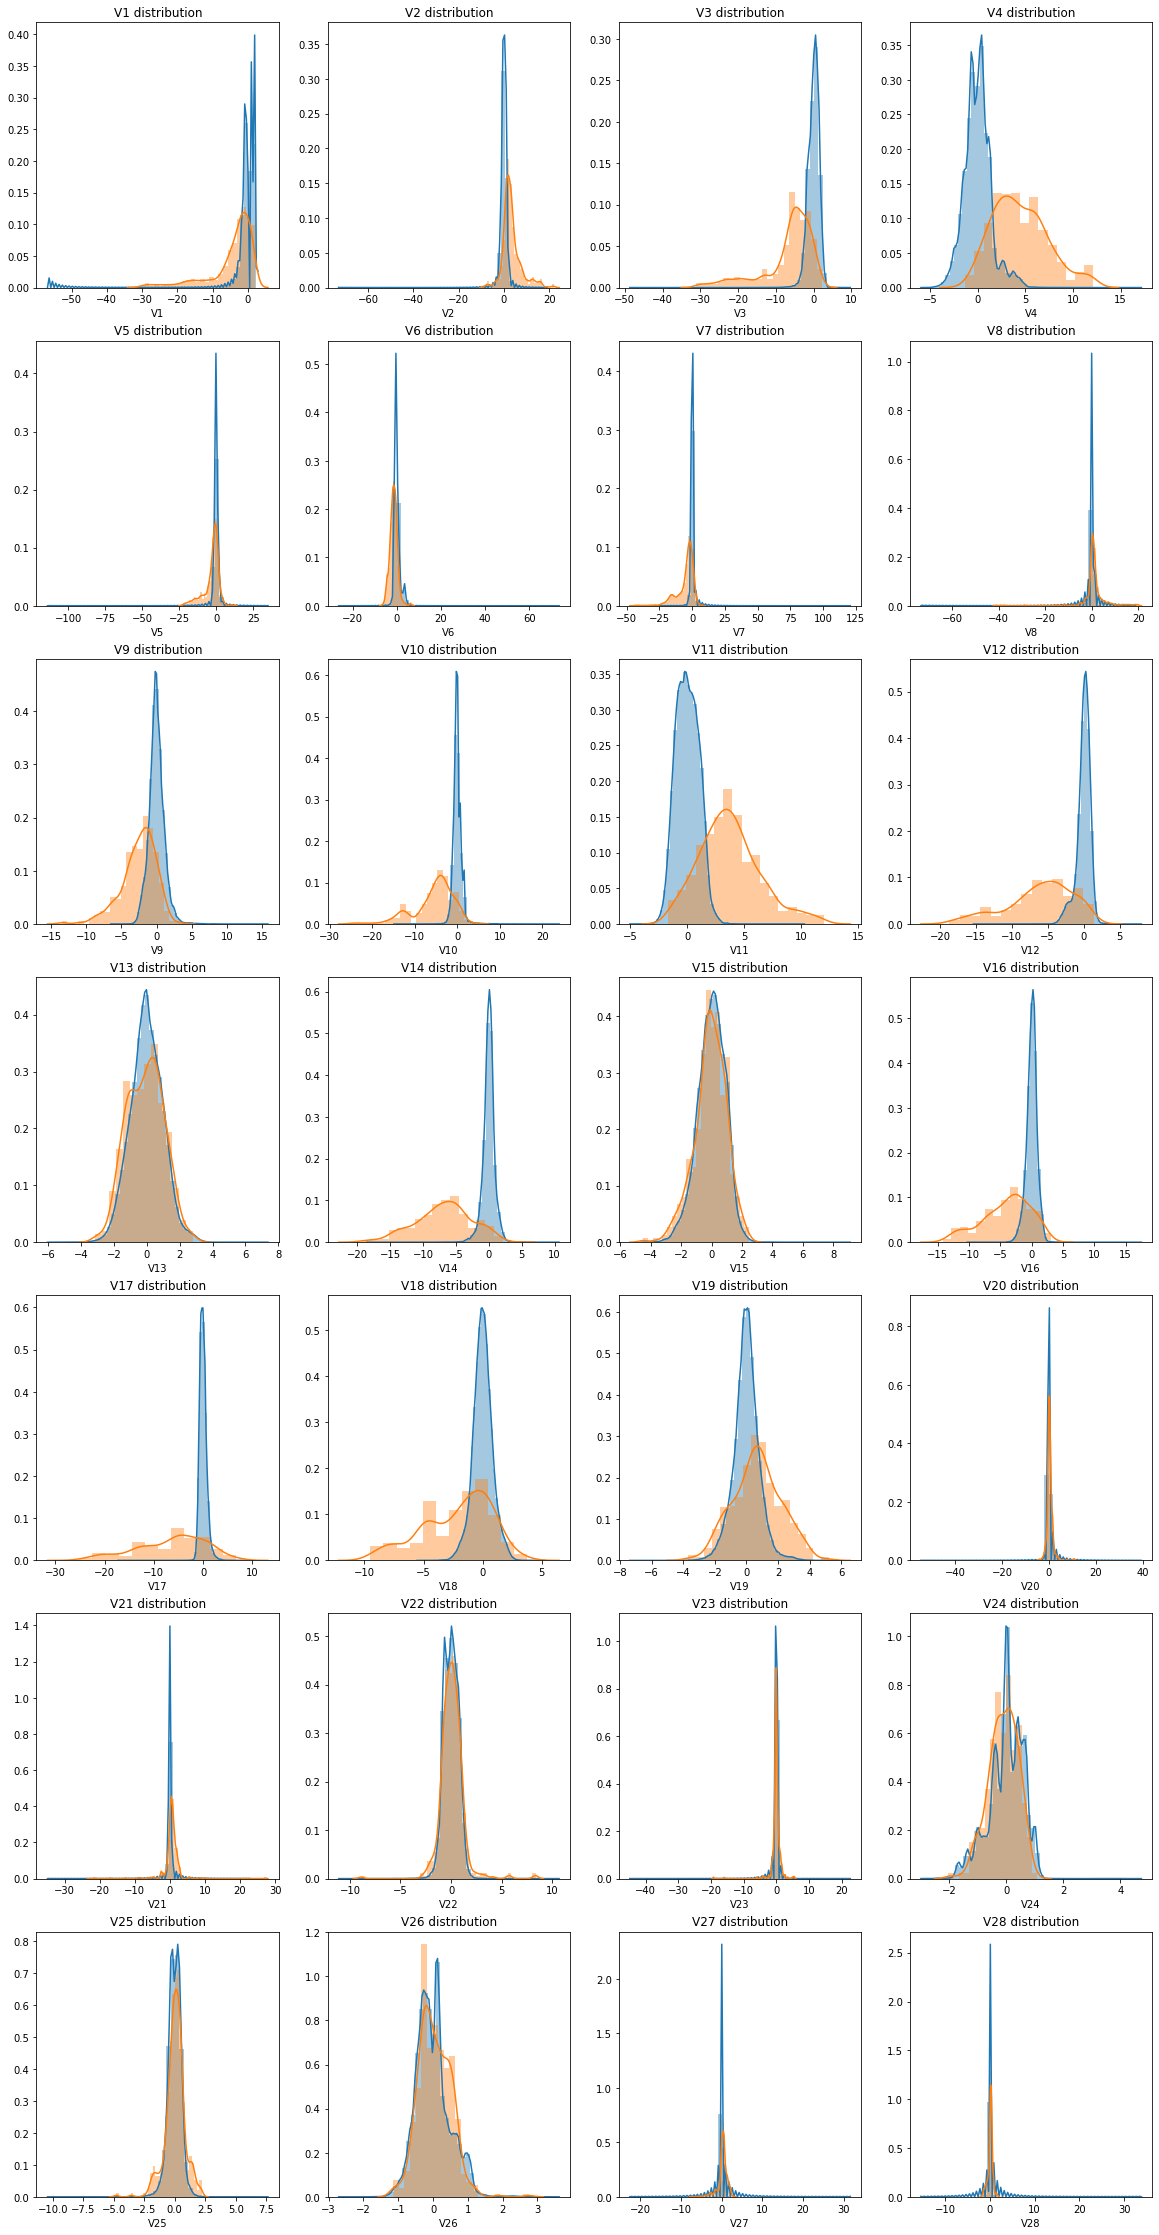

In [16]:
plt.figure(figsize=(20,40))

ax =[]

for i in range(1,29):
    ax.append(plt.subplot(7,4,i))
    sns.distplot(data[data.Class==0][f'V{i}'], label='No Fraud')
    sns.distplot(data[data.Class==1][f'V{i}'], label='Fraud')
    ax[i-1].title.set_text(f'V{i} distribution')

plt.show()

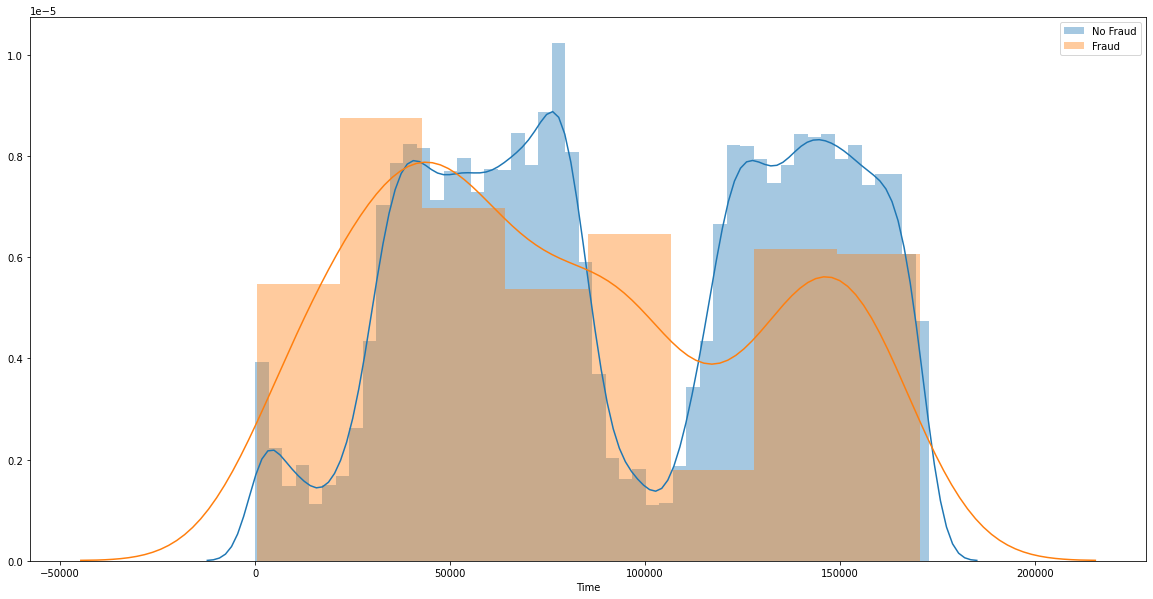

In [56]:
plt.figure(figsize=(20,10))
sns.distplot(data[data.Class==0]['Time'], label='No Fraud')
sns.distplot(data[data.Class==1]['Time'], label='Fraud')
plt.legend()
plt.show()

In [17]:
selected_feat = ['V3', 'V4', 'V9', 'V10', 'V11', 'V14', 'V16', 'V17', 'V18']

In [18]:
data_reduced = data[selected_feat]

## Anomaly Detection - Elliptic Envelope

In [19]:
from sklearn.covariance import EllipticEnvelope

In [20]:
clf = EllipticEnvelope(assume_centered=False, contamination=0.001667, support_fraction=.99)

In [21]:
from sklearn.preprocessing import RobustScaler

In [22]:
X = data_reduced
y = data.Class

In [23]:
#scaler = RobustScaler()
#X_sc = scaler.fit_transform(X)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y)

In [25]:
clf.fit(X_train)

EllipticEnvelope(contamination=0.001667, support_fraction=0.99)

In [26]:
y_pred = clf.predict(X_test)

In [27]:
y_pred[y_pred == 1] = 0

In [28]:
y_pred[y_pred == -1] = 1

In [29]:
(y_pred != y_test).sum()

74

In [30]:
y_pred[y_test == 1].mean()

0.6210526315789474

In [31]:
from sklearn.metrics import classification_report

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.61      0.62      0.61        95

    accuracy                           1.00     56746
   macro avg       0.80      0.81      0.81     56746
weighted avg       1.00      1.00      1.00     56746



In [50]:
from sklearn.preprocessing import power_transform
X_power = power_transform(X_sc, method='yeo-johnson')

In [60]:
clf = EllipticEnvelope(contamination=0.001667, support_fraction=.99)

In [61]:
clf.fit(X_power)

EllipticEnvelope(contamination=0.001667, support_fraction=0.99)

In [62]:
y_pred = clf.predict(X_power)

In [63]:
y_pred[y_pred == 1] = 0

In [64]:
y_pred[y_pred == -1] = 1

In [65]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    283253
           1       0.60      0.60      0.60       473

    accuracy                           1.00    283726
   macro avg       0.80      0.80      0.80    283726
weighted avg       1.00      1.00      1.00    283726



## Anomaly Detection - Local Outlier Factor

In [33]:
from sklearn.neighbors import LocalOutlierFactor

In [34]:
lof = LocalOutlierFactor(n_neighbors=100, contamination= 0.001667, novelty=True)

In [35]:
lof.fit(X_train)

LocalOutlierFactor(contamination=0.001667, n_neighbors=100, novelty=True)

In [36]:
y_pred = lof.predict(X_test)

In [37]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [38]:
y_pred[y_pred == 1] = 0

In [39]:
y_pred[y_pred == -1] = 1

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.00      0.00      0.00        95

    accuracy                           1.00     56746
   macro avg       0.50      0.50      0.50     56746
weighted avg       1.00      1.00      1.00     56746



## Anomaly Detection - Isolation Forest

In [41]:
from sklearn.ensemble import IsolationForest

In [48]:
isof = IsolationForest(n_estimators=500, max_samples=0.7, contamination=0.001667)

In [49]:
isof.fit(X_train)

IsolationForest(contamination=0.001667, max_samples=0.7, n_estimators=500)

In [50]:
y_pred = isof.predict(X_test)

In [51]:
y_pred[y_pred == 1] = 0

In [52]:
y_pred[y_pred == -1] = 1

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.47      0.46      0.47        95

    accuracy                           1.00     56746
   macro avg       0.73      0.73      0.73     56746
weighted avg       1.00      1.00      1.00     56746

